## Name: Ravi Sista

### Task 1:  Prediction using Supervised ML

In this Task, we've to predict the percentage of marks of an student based on the number of study hours.
This task will be executed by using the concept of Simple Linear Regression.

The dataset for this Task is available at the following link: http://bit.ly/w-data

### Import the required Libraries

In [1]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the dataset

In [2]:
# Step 2: Import the dataset
data = "http://bit.ly/w-data"
df = pd.read_csv(data)

# Print the data frame to have a look at the data
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Checking if there is a presence of null values or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


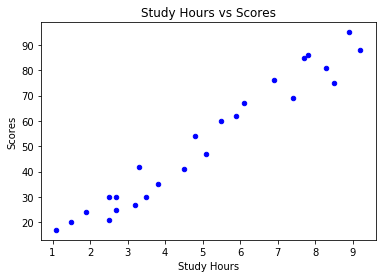

In [10]:
# Distribution of Scores
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores', alpha = 1.0, color = 'Blue')
plt.title('Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

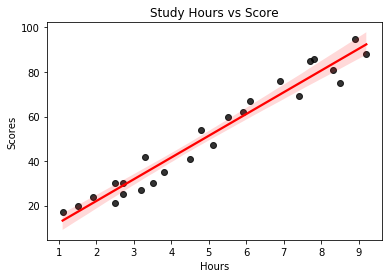

In [14]:
# Regression plot
sns.regplot(df['Hours'],df['Scores'],color = 'green',scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Study Hours vs Score')
plt.show()

### Preparing our data

In [18]:
# Attributes
X = df.iloc[:,:-1].values

# Labels
y = df.iloc[:,1].values


In [19]:
# Creating Training & Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 50)

### Using Scikit-Learn library

In [20]:
# Training the Regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Printing the Intercept & the Coefficient
print("Intercept: ",reg.coef_)
print("Coefficient: ",reg.intercept_)

Intercept:  [9.77580339]
Coefficient:  2.483673405373196


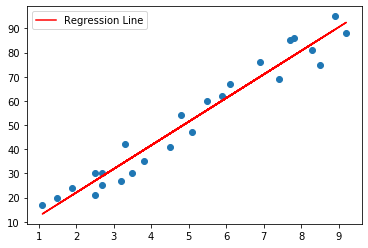

In [22]:
# Regression line
line = reg.intercept_ + (reg.coef_ * X)

# Plotting test data
plt.scatter(X,y)
plt.plot(X,line,color = 'red', label = 'Regression Line')
plt.legend()
plt.show()

### Predicting the scores using test data 

In [23]:
# Printing the test data
print(X_test)

# Storing the predicted values in y_pred
y_pred = reg.predict(X_test) 

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [24]:
# Comparing the Actual & Predicted values
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df_comp

,Actual,Predicted
0,95,89.488324
1,30,28.878343
2,76,69.936717
3,35,39.631726
4,17,13.237057


In [25]:
# Estimating the Training & Testing Score
print("Training Score: ",reg.score(X_train,y_train))
print("Testing Score: ",reg.score(X_test,y_test))

Training Score:  0.9434439761512203
Testing Score:  0.9764314504425582


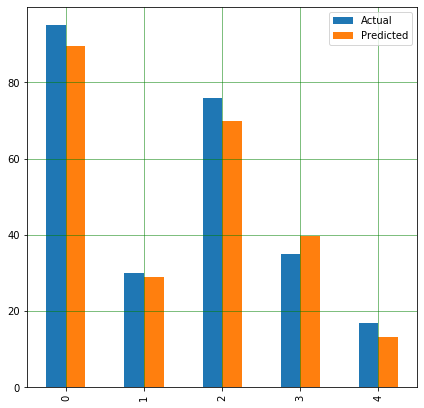

In [27]:
# Plot depicting the comparison between Actual & Predicted Values
df_comp.plot(kind = 'bar', figsize = (7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

### Predicted score if a student studies for 9.25 hrs/day

In [29]:
# Predicting the score if a student studies for 9.25 hrs/day
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90985477015731


### Model Evaluation

In [30]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.2182572418876685
Mean Squared Error: 20.80254458138046
Root Mean Squared Error: 4.560980660053325
R-2: 0.9764314504425582


R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variables.
The accuracy of this regression model is 97.64%.